In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
import xgboost as xgb
import pandas as pd
from features.UserJoin import UserJoin
from features.UserJoin import submit, diff, plt_month, plt_day
import config as C
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/envs/miner/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
# data
ds = UserJoin()

In [4]:
print(ds.day.columns)
ds.day.iloc[:1, 9:]

Index(['rq', 'kwh', 'kwh_rap', 'kwh_pap_r1', 'kwh_pap_r2', 'kwh_pap_r3',
       'kwh_pap_r4', 'kwh_cal', 'pr2', 'pr3', 'pr4', '   ', 'ELEC_TYPE_NAME',
       'VOLT_NAME', 'PRC_NAME', 'CONTRACT_CAP', 'RUN_CAP', 'SHIFT_NO',
       'BUILD_DATE', 'CANCEL_DATE', 'CHK_CYCLE', 'LAST_CHK_DATE', 'TMP_NAME',
       'TMP_DATE', 'IS_FLAG', 'label', '2_3', '2_4', '3_4', 'daycv', 'type'],
      dtype='object')


,pr3,pr4,,ELEC_TYPE_NAME,VOLT_NAME,PRC_NAME,CONTRACT_CAP,RUN_CAP,SHIFT_NO,BUILD_DATE,...,LAST_CHK_DATE,TMP_NAME,TMP_DATE,IS_FLAG,label,2_3,2_4,3_4,daycv,type
id,,,,,,,,,,,,,,,,,,,,,
179404030,0.0,0.353611,NaN,城镇居民生活用电,交流380V,居民生活<1kV(合表),20.0,20.0,0.0,1998/12/1,...,1998/12/1,非临时用电,0.0,NaN,test,0.646389,0.292777,0.353611,0.971013,-1


In [6]:
UserJoin

['rq', 'kwh', 'kwh_rap', 'type']

/opt/conda/envs/miner/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[16:40:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
28


<AxesSubplot:>

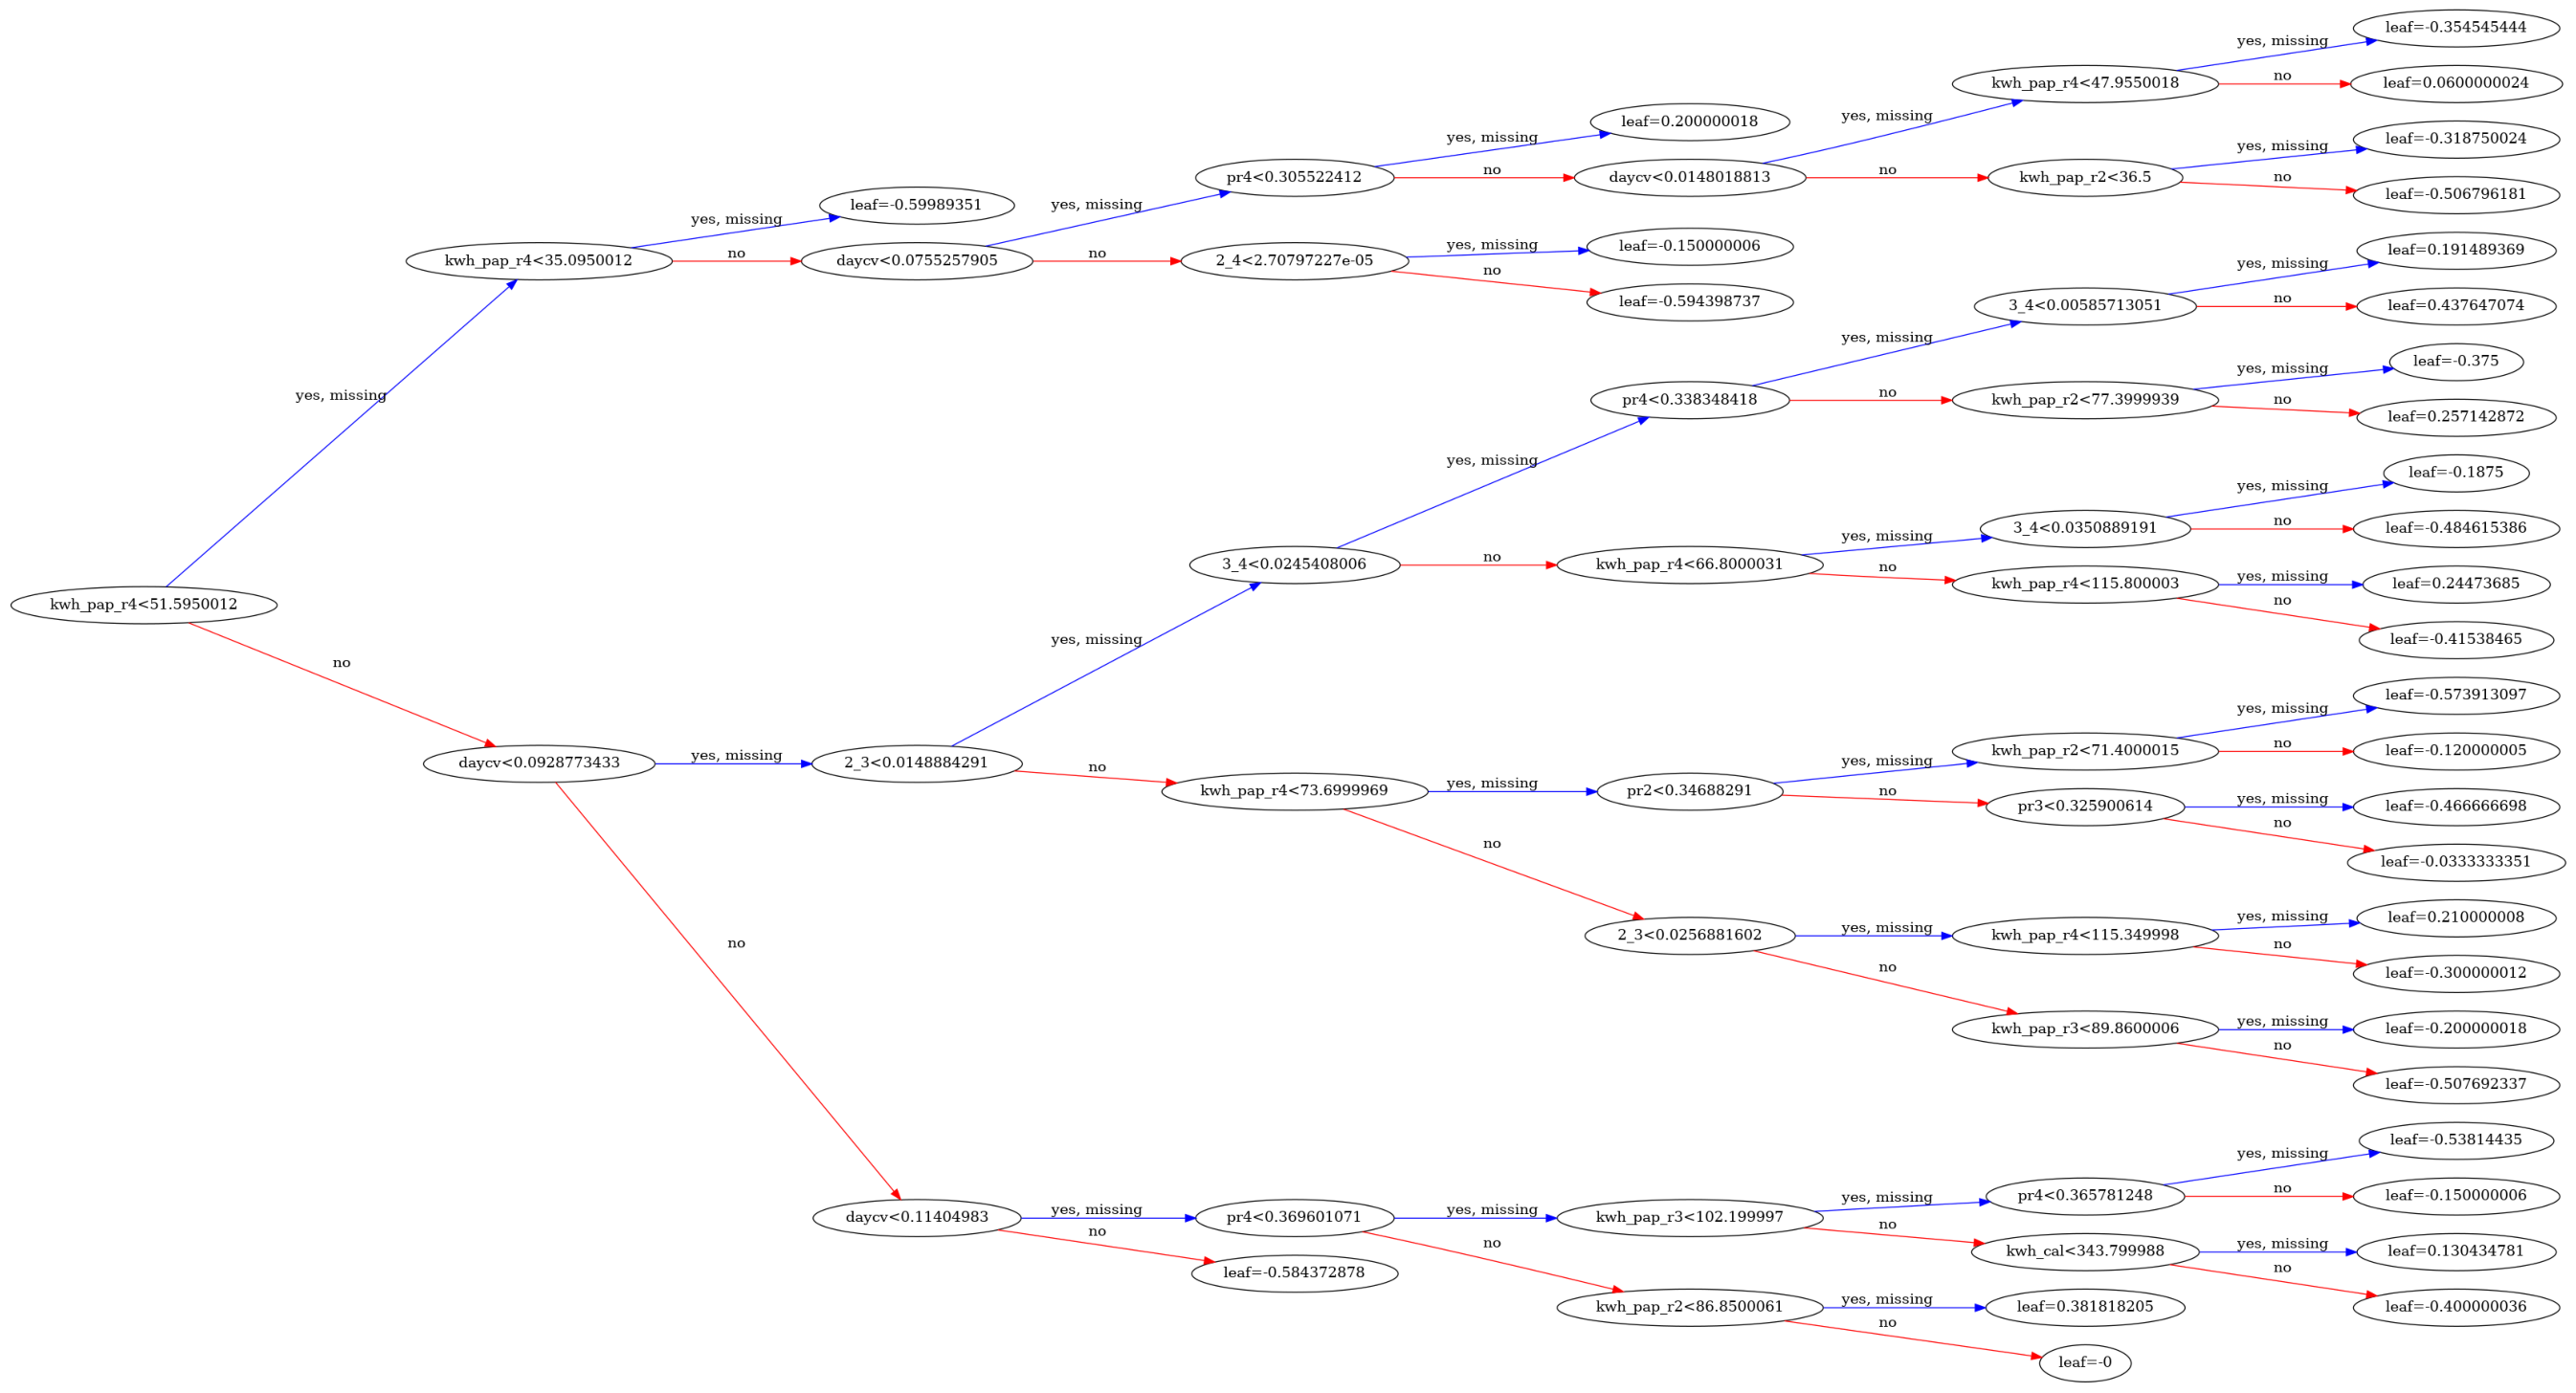

In [8]:
from xgboost import plot_tree
df = ds.day
df = df[df.type == 0]
x = df.loc[df.label != 'test', C.day_features]
x_val = df.loc[df.label == 'test', C.day_features]
y = df.loc[df.label != 'test', 'IS_FLAG']

model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x, y)
y_pred = model.predict(x)
print((y_pred != y).sum())
fig, ax = plt.subplots(figsize=(48, 32))
plot_tree(model, ax=ax, rankdir='LR')


In [28]:
pred = pd.DataFrame({'id': x.index.values, 'pred': y_pred}).groupby('id').sum()
pred[pred.pred>40]

,pred
id,
1998335717,56
2294741747,57
2482675592,57
2614556942,57
2654985038,57
2674563661,55
2695447713,57
2816697143,57
2825771263,57


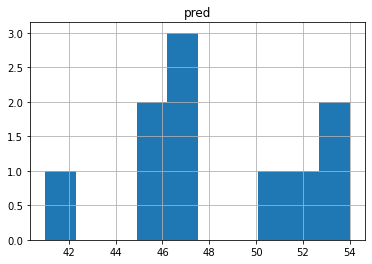

找到 10
10
in s1 not s2 18
in s2 not s1 1
inner 9
0.32142857142857145


In [29]:
y_val = model.predict(x_val)
pred = pd.DataFrame({'id': x_val.index.values, 'pred': y_val}).groupby('id').sum()
pred = pred[pred.pred > 40]
pred.hist()
plt.show()
print('找到', pred.shape[0])
submit(pred.index.unique(), 'submit_3_8_1.csv')
_ = diff('submit_3_7_3.csv', 'submit_3_8_1.csv')

In [22]:
# plt_day(pred.index.unique(), df=ds.day)
# plt_day(pred.index.unique()[:40], df=ds.day, cols=['daycv'])
plt_month(pred.index.unique()[:40], df=ds.month)

Int64Index([ 179418058,  179458306,  179547052,  179554514,  179569820,
             874996400, 1390088754, 1429892107, 1606708811, 1862376457,
            1868915135, 1912367373, 1916407803, 1962780967, 2071313507,
            2093219981, 2115712219, 2186749200, 2238809293, 2245541933],
           dtype='int64', name='id')


Int64Index([2256064355, 2271232929, 2337066378, 2347718608, 2347718610,
            2427050072, 2442626095, 2445049876, 2451165982, 2479963778,
            2496032641, 2520770436, 2523401557, 2576321385, 2602819207,
            2668866401, 2717225077, 2741872006, 2755128229, 2759232590],
           dtype='int64', name='id')


In [23]:
# plt_day(C.minerids, df=ds.day, cols=['daycv'])
# plt_day(C.minerids, df=ds.day)
plt_month(C.minerids, df=ds.month)

[329833811, 2294741747, 2654985038, 2674563661, 2695447713, 1998335717, 2482675592, 2614556942, 2816697143, 2825771263]


In [24]:
plt_day(C.minerids, df=ds.day)

[329833811, 2294741747, 2654985038, 2674563661, 2695447713, 1998335717, 2482675592, 2614556942, 2816697143, 2825771263]
